# AP Research Data Processing Notebook 3: Determine Optimal pH Level for Electroreduction
The following codes in this Jupyter notebook (E0.ipynb) contains the data analysis portion of Benjamin Chang's AP Research project on *Optimal Conditions For Small-Scale Electroreduction of Common Non-Steroidal Anti-Inflammatory Drugs*. All charts, graphs, and figures are produced from the raw data in .csv files and manipulated by the following codes.

## Initializing Libraries and Style

In [2071]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats
import math
from matplotlib import pyplot
from IPython.display import display, HTML

In [2072]:
font = {
    'family' : 'georgia',
    'color': 'black',
    'weight': 'normal',
    'size': 11
}

## Salicylic Acid

In [2084]:
#Merging the data into one dataframe
csv_file_list = ['E2-SA/E2-SA-2.csv', 'E2-SA/E2-SA-4.csv', 'E2-SA/E2-SA-7.csv', 'E2-SA/E2-SA-10.csv', 'E2-SA/E2-SA-12.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [2085]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [2086]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(1, 16, 3):
    std.append(merged_df.loc[merged_df['pH'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2087]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype=object)
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [2088]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='object')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2089]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='object')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2090]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(1, 15, 3):
    #Get mean from each pH row
    interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference'].round(5).apply(str)
    full.append(mean + ' ± ' + interval)

full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

# Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4])

# Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

# Save to new csv file
merged_df.to_csv('Processed Data/E2-SA-Processed.csv')

# Keep only the columns we need
save_dfSA = merged_df[['pH', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E2-SA-Table.html')
merged_df

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/3324753826.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)


,pH,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,1.0,330.0,0.16850,0.13246,-21.388611,-0.03604,0.000261,0.000324,-0.036364,-0.035716,-0.03604 ± 0.00032
1,4.0,330.0,0.16850,0.14856,-11.833086,-0.01994,0.000754,0.000936,-0.020876,-0.019004,-0.01994 ± 0.00094
2,7.0,330.0,0.16844,0.15350,-8.869338,-0.01494,0.000397,0.000494,-0.015434,-0.014446,-0.01494 ± 0.00049
3,10.0,330.0,0.16834,0.16060,-4.597294,-0.00774,0.000607,0.000753,-0.008493,-0.006987,-0.00774 ± 0.00075
4,13.0,330.0,0.16850,0.16558,-1.732635,-0.00292,0.000415,0.000515,-0.003435,-0.002405,-0.00292 ± 0.00051


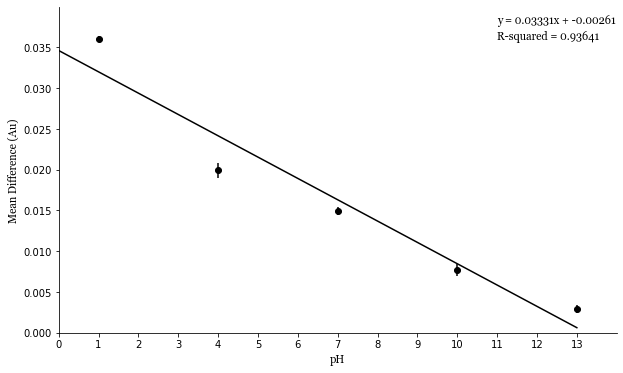

In [2091]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['pH'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('pH', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 14)
pyplot.ylim(0, 0.040)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 14, 1))
pyplot.yticks(np.arange(0, 0.040, 0.005))

#Plot the linear regression line
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(np.arange(0, 14, 1)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph in the center
pyplot.text(11, 0.038, 'y = ' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graph in the center
pyplot.text(11, 0.036, 'R-squared = ' + str(round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove right and top border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E2-SA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfr = pd.DataFrame({'Sample': ['E2-SA'], 'Linear Regression Equation': [str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(1), 5))], 'R-squared Value': [round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)]})

## Ethyl Alcohol

In [2092]:
#Merging the data into one dataframe
csv_file_list = ['E2-EA/E2-EA-2.csv', 'E2-EA/E2-EA-4.csv', 'E2-EA/E2-EA-7.csv', 'E2-EA/E2-EA-10.csv', 'E2-EA/E2-EA-12.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [2093]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [2094]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(1, 16, 3):
    std.append(merged_df.loc[merged_df['pH'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2095]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype=object)
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [2096]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='object')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2097]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='object')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2098]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(1, 15, 3):
    #Get mean from each pH row
    interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference'].round(5).apply(str)
    full.append(mean + ' ± ' + interval)

full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

# Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4])

# Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

# Save to new csv file
merged_df.to_csv('Processed Data/E2-EA-Processed.csv')

# Keep only the columns we need
save_dfEA = merged_df[['pH', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E2-EA-Table.html')
merged_df

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/3961531537.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)


,pH,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,1.0,330.0,0.45928,0.25852,-43.711894,-0.20076,0.000270,0.000335,-0.201095,-0.200425,-0.20076 ± 0.00034
1,4.0,330.0,0.45932,0.28438,-38.086734,-0.17494,0.000313,0.000389,-0.175329,-0.174551,-0.17494 ± 0.00039
2,7.0,330.0,0.45922,0.32760,-28.661653,-0.13162,0.000370,0.00046,-0.13208,-0.13116,-0.13162 ± 0.00046
3,10.0,330.0,0.45930,0.38344,-16.516433,-0.07586,0.000288,0.000358,-0.076218,-0.075502,-0.07586 ± 0.00036
4,13.0,330.0,0.45920,0.42158,-8.192505,-0.03762,0.000327,0.000406,-0.038026,-0.037214,-0.03762 ± 0.00041


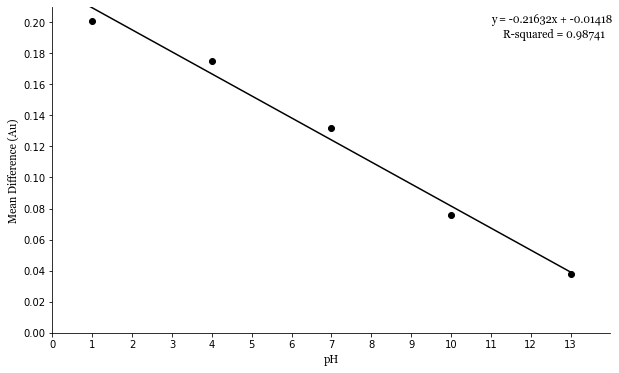

In [2099]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['pH'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('pH', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 14)
pyplot.ylim(0, 0.210)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 14, 1))
pyplot.yticks(np.arange(0, 0.210, 0.02))

#Plot the linear regression line
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(np.arange(0, 14, 1)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph in the center
pyplot.text(11, 0.2, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graph in the center
pyplot.text(11.3, 0.19, 'R-squared = ' + str(round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove right and top border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E2-EA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E2-EA', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(1), 5)), 'R-squared Value': round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Citric Acid Monohydrate

In [2100]:
#Merging the data into one dataframe
csv_file_list = ['E2-CAM/E2-CAM-2.csv', 'E2-CAM/E2-CAM-4.csv', 'E2-CAM/E2-CAM-7.csv', 'E2-CAM/E2-CAM-10.csv', 'E2-CAM/E2-CAM-12.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [2101]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [2102]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(1, 16, 3):
    std.append(merged_df.loc[merged_df['pH'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2103]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype=object)
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [2104]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='object')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2105]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='object')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2106]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(1, 15, 3):
    #Get mean from each pH row
    interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference'].round(5).apply(str)
    full.append(mean + ' ± ' + interval)

full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

# Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4])

# Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

# Save to new csv file
merged_df.to_csv('Processed Data/E2-CAM-Processed.csv')

# Keep only the columns we need
save_dfCAM = merged_df[['pH', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E2-CAM-Table.html')
merged_df

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/2342732667.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)


,pH,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,1.0,330.0,0.05738,0.02146,-62.600412,-0.03592,0.000239,0.000296,-0.036216,-0.035624,-0.03592 ± 0.0003
1,4.0,330.0,0.05738,0.02856,-50.226999,-0.02882,0.000192,0.000239,-0.029059,-0.028581,-0.02882 ± 0.00024
2,7.0,330.0,0.05752,0.04248,-26.147878,-0.01504,0.000152,0.000188,-0.015228,-0.014852,-0.01504 ± 0.00019
3,10.0,330.0,0.05738,0.04842,-15.614228,-0.00896,0.000313,0.000389,-0.009349,-0.008571,-0.00896 ± 0.00039
4,13.0,330.0,0.05738,0.05566,-2.997153,-0.00172,0.000249,0.000309,-0.002029,-0.001411,-0.00172 ± 0.00031


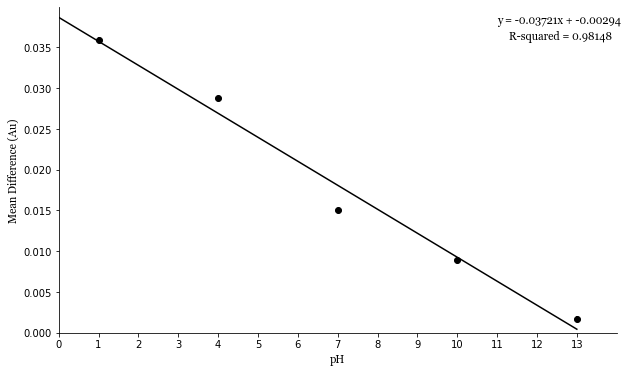

In [2107]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['pH'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('pH', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 14)
pyplot.ylim(0, 0.04)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 14, 1))
pyplot.yticks(np.arange(0, 0.04, 0.005))

#Plot the linear regression line
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(np.arange(0, 14, 1)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph in the center
pyplot.text(11, 0.038, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graph in the center
pyplot.text(11.3, 0.036, 'R-squared = ' + str(round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove right and top border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E2-CAM-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E2-CAM', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(1), 5)), 'R-squared Value': round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Acetylsalicylic Acid

In [2108]:
#Merging the data into one dataframe
csv_file_list = ['E2-AA/E2-AA-2.csv', 'E2-AA/E2-AA-4.csv', 'E2-AA/E2-AA-7.csv', 'E2-AA/E2-AA-10.csv', 'E2-AA/E2-AA-12.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [2109]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [2110]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(1, 16, 3):
    std.append(merged_df.loc[merged_df['pH'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2111]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype=object)
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [2112]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='object')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2113]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='object')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2114]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(1, 15, 3):
    #Get mean from each pH row
    interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference'].round(5).apply(str)
    full.append(mean + ' ± ' + interval)

full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

# Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4])

# Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

# Save to new csv file
merged_df.to_csv('Processed Data/E2-AA-Processed.csv')

# Keep only the columns we need
save_dfAA = merged_df[['pH', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E2-AA-Table.html')
merged_df

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/1940807464.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)


,pH,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,1.0,330.0,0.05884,0.00534,-90.921394,-0.05350,0.000758,0.000942,-0.054442,-0.052558,-0.0535 ± 0.00094
1,4.0,330.0,0.05884,0.00748,-87.285214,-0.05136,0.000699,0.000867,-0.052227,-0.050493,-0.05136 ± 0.00087
2,7.0,330.0,0.05886,0.00936,-84.096797,-0.04950,0.000430,0.000534,-0.050034,-0.048966,-0.0495 ± 0.00053
3,10.0,330.0,0.05884,0.02838,-51.764234,-0.03046,0.000586,0.000727,-0.031187,-0.029733,-0.03046 ± 0.00073
4,13.0,330.0,0.05884,0.04760,-19.097048,-0.01124,0.000680,0.000845,-0.012085,-0.010395,-0.01124 ± 0.00084


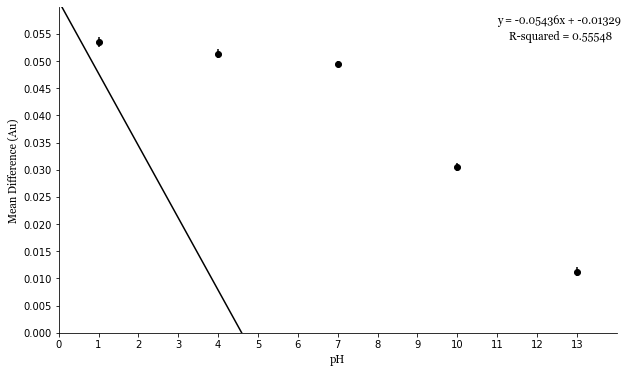

In [2115]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['pH'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('pH', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 14)
pyplot.ylim(0, 0.06)

#Logarithmic scale merged_df['Mean Difference'] and merged_df['pH']
merged_df['pH'] = np.log(merged_df['pH'])

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 14, 1))
pyplot.yticks(np.arange(0, 0.06, 0.005))

#Plot the linear regression line
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(np.arange(0, 14, 1)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph in the center
pyplot.text(11, 0.057, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graph in the center
pyplot.text(11.3, 0.054, 'R-squared = ' + str(round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove right and top border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E2-AA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E2-AA', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(1), 5)), 'R-squared Value': round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Acetaminophen

In [2116]:
#Merging the data into one dataframe
csv_file_list = ['E2-A/E2-A-2.csv', 'E2-A/E2-A-4.csv', 'E2-A/E2-A-7.csv', 'E2-A/E2-A-10.csv', 'E2-A/E2-A-12.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [2117]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [2118]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(1, 16, 3):
    std.append(merged_df.loc[merged_df['pH'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2119]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype=object)
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [2120]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='object')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2121]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(1, 16, 3):
    interval = t_value * merged_df.loc[merged_df['pH'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='object')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2122]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(1, 15, 3):
    #Get mean from each pH row
    interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)
    mean = merged_df.loc[merged_df['pH'] == i]['Mean Difference'].round(5).apply(str)
    full.append(mean + ' ± ' + interval)

full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

# Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4])

# Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

# Save to new csv file
merged_df.to_csv('Processed Data/E2-A-Processed.csv')

# Keep only the columns we need
save_dfA = merged_df[['pH', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E2-A-Table.html')
merged_df

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/1969170274.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  interval = round(merged_df.loc[merged_df['pH'] == i]['Interval'].astype(np.float), 5).apply(str)


,pH,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,1.0,330.0,0.43228,0.28144,-34.894051,-0.15084,0.000230,0.000286,-0.151126,-0.150554,-0.15084 ± 0.00029
1,4.0,330.0,0.43228,0.31846,-26.330145,-0.11382,0.000311,0.000387,-0.114207,-0.113433,-0.11382 ± 0.00039
2,7.0,330.0,0.43232,0.36526,-15.511654,-0.06706,0.000089,0.000111,-0.067171,-0.066949,-0.06706 ± 0.00011
3,10.0,330.0,0.43228,0.38428,-11.103901,-0.04800,0.000354,0.000439,-0.048439,-0.047561,-0.048 ± 0.00044
4,13.0,330.0,0.43228,0.41850,-3.187727,-0.01378,0.000432,0.000537,-0.014317,-0.013243,-0.01378 ± 0.00054


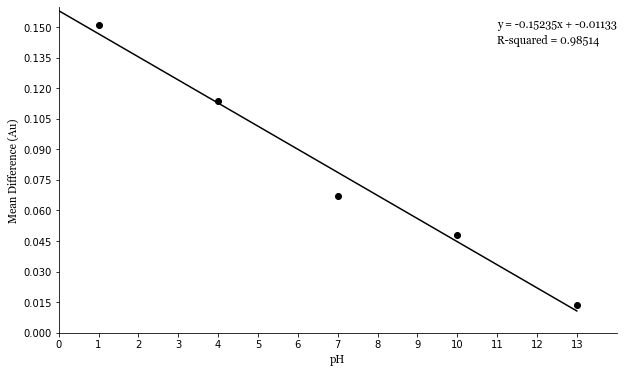

In [2123]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['pH'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('pH', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 14)
pyplot.ylim(0, 0.16)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 14, 1))
pyplot.yticks(np.arange(0, 0.16, 0.015))

#Plot the linear regression line
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(np.arange(0, 14, 1)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph in the center
pyplot.text(11, 0.15, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graph in the center
pyplot.text(11, 0.142, 'R-squared = ' + str(round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E2-A-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E2-A', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['pH'], merged_df['Mean Difference'], 1))(1), 5)), 'R-squared Value': round(np.corrcoef(merged_df['pH'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Overall Analysis

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/2685586734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/2685586734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_2784/2685586734.py:7: SettingWithCopyWarning: 
A value is trying to be 

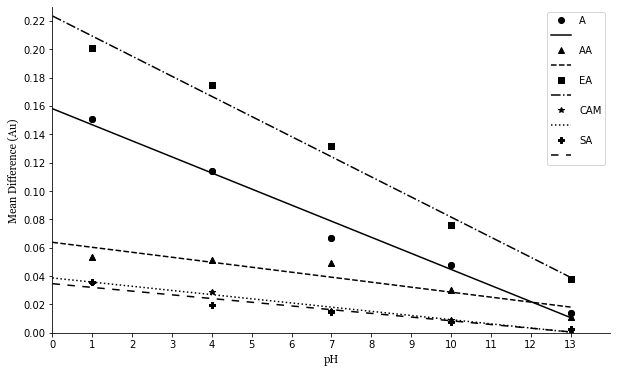

,Sample,Linear Regression Equation,R-squared Value
0,E2-SA,0.03462x + 0.032,0.93641
1,E2-EA,0.22341x + 0.20923,0.98741
2,E2-CAM,0.03869x + 0.03574,0.98148
3,E2-AA,0.061x + 0.04772,0.55548
4,E2-A,0.15802x + 0.14669,0.98514


In [2124]:
#Plot all the save_dfs data on the same plot with different color
pyplot.figure(figsize=(10, 6))

#Make mean difference positive
save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
save_dfSA['Mean Difference'] = abs(save_dfSA['Mean Difference'])
save_dfCAM['Mean Difference'] = abs(save_dfCAM['Mean Difference'])
save_dfEA['Mean Difference'] = abs(save_dfEA['Mean Difference'])

#Plot save_dfA with blue circle markers 
pyplot.plot(save_dfA['pH'], save_dfA['Mean Difference'], 'ko')

#save_dfA error bar line
pyplot.errorbar(save_dfA['pH'], save_dfA['Mean Difference'], yerr=save_dfA['Interval'], fmt='ko')

#Linear regression line in blue
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(save_dfA['pH'], save_dfA['Mean Difference'], 1))(np.arange(0, 14, 1)), 'k-')

#Plot save_dfAA with red triangle markers
pyplot.plot(save_dfAA['pH'], save_dfAA['Mean Difference'], 'k^')

#save_dfAA error bar
pyplot.errorbar(save_dfAA['pH'], save_dfAA['Mean Difference'], yerr=save_dfAA['Interval'], fmt='k^')

#Linear regression line in red
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(save_dfAA['pH'], save_dfAA['Mean Difference'], 1))(np.arange(0, 14, 1)), 'k--')

#Plot save_dfEA with green square markers
pyplot.plot(save_dfEA['pH'], save_dfEA['Mean Difference'], 'ks')

#save_dfEA error bar
pyplot.errorbar(save_dfEA['pH'], save_dfEA['Mean Difference'], yerr=save_dfEA['Interval'], fmt='ks')

#Linear regression line in green
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(save_dfEA['pH'], save_dfEA['Mean Difference'], 1))(np.arange(0, 14, 1)), 'k-.')

#Plot save_dfCAM with black star markers
pyplot.plot(save_dfCAM['pH'], save_dfCAM['Mean Difference'], 'k*')

#save_dfCAM error bar
pyplot.errorbar(save_dfCAM['pH'], save_dfCAM['Mean Difference'], yerr=save_dfCAM['Interval'], fmt='k*')

#Linear regression line in black
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(save_dfCAM['pH'], save_dfCAM['Mean Difference'], 1))(np.arange(0, 14, 1)), 'k:')

#Plot save_dfSA with yellow plus markers
pyplot.plot(save_dfSA['pH'], save_dfSA['Mean Difference'], 'kP')

#save_dfSA error bar
pyplot.errorbar(save_dfSA['pH'], save_dfSA['Mean Difference'], yerr=save_dfSA['Interval'], fmt='kP')

#Linear regression line in yellow
pyplot.plot(np.arange(0, 14, 1), np.poly1d(np.polyfit(save_dfSA['pH'], save_dfSA['Mean Difference'], 1))(np.arange(0, 14, 1)), 'k-', dashes = (5, 5))

#Label the plot
pyplot.xlabel('pH', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 14)
pyplot.ylim(0, 0.23)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 14, 1))
pyplot.yticks(np.arange(0, 0.23, 0.02))

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Print legend of the plot where A = blue line, AA = red line, SA = green line, CAM = black line, EA = yellow line and show the line and color next to each other on top right 
pyplot.legend(['A', '', 'AA', '', 'EA', '', 'CAM', '', 'SA', ''], loc = 'upper right')

#Save data
dfr.to_csv('Processed Data/E2-Plot-Data.csv')

#Save graph
pyplot.savefig('Graphs/E2-Plot-Graph.jpg', dpi=500)

#Display the plot
pyplot.show()
dfr